# Supervised Machine Learning - Walmart Store Sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings


## EXPLORATORY DATA ANALYSIS

In [2]:
df = pd.read_csv('src/Walmart_Store_Sales.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [4]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])


Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [5]:
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [6]:
df.isnull().sum()

Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [8]:
df.shape

(150, 8)

In [9]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [10]:
# Visualize pairwise dependencies
fig = px.scatter_matrix(df)
fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False, 
            autosize=False, height = 1000, width = 1000)
fig.show()

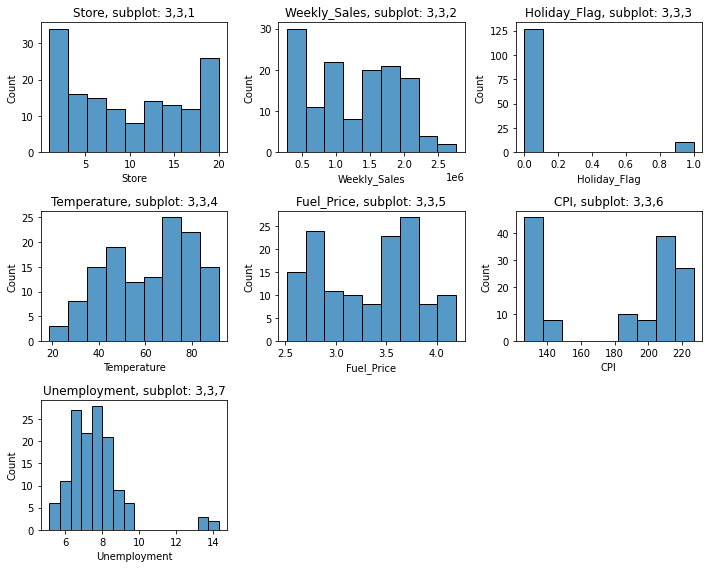

In [12]:

list_to_plot = ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,8))

for i in list_to_plot:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.histplot(df[i])
    c = c + 1

plt.tight_layout()
plt.show()

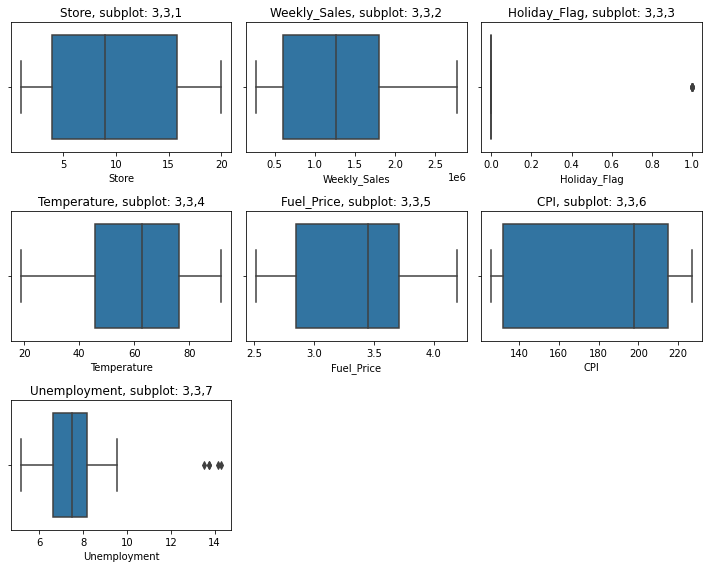

In [13]:
list_to_plot = ['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,8))

for i in list_to_plot:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(x=df[i])
    c = c + 1

plt.tight_layout()
plt.show()

In [14]:

num_features = ['Store','Weekly_Sales','Temperature',
              'Fuel_Price', 'CPI', 'Unemployment']
for i in range(len(num_features)):
    fig = px.box(df[num_features[i]], width=500, height=500)
    fig.show()

## DATA CLEANING
#### 1 - Handling 'Date' column

In [15]:
df['Date']= pd.to_datetime(df['Date'],dayfirst=True, format='%d-%m-%Y')

In [16]:
df['Day_of_week']= df['Date'].dt.day_name()

In [17]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).month

In [18]:
df['Year'].unique()

array([2011., 2012.,   nan, 2010.])

In [19]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day_of_week,Year,Month,Day
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,Friday,2011.0,2.0,2.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,Friday,2011.0,3.0,3.0
2,17.0,2012-07-27,NaN,0.0,NaN,NaN,130.719581,5.936,Friday,2012.0,7.0,7.0
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,Friday,2010.0,5.0,5.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         150 non-null    float64       
 1   Date          132 non-null    datetime64[ns]
 2   Weekly_Sales  136 non-null    float64       
 3   Holiday_Flag  138 non-null    float64       
 4   Temperature   132 non-null    float64       
 5   Fuel_Price    136 non-null    float64       
 6   CPI           138 non-null    float64       
 7   Unemployment  135 non-null    float64       
 8   Day_of_week   132 non-null    object        
 9   Year          132 non-null    float64       
 10  Month         132 non-null    float64       
 11  Day           132 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 14.2+ KB


In [21]:
print(df['Date'].min())
print(df['Date'].max())

2010-02-05 00:00:00
2012-10-19 00:00:00


In [22]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Day_of_week', 'Year', 'Month',
       'Day'],
      dtype='object')

In [23]:
df['Day_of_week'].unique()

array(['Friday', nan], dtype=object)

In [24]:
fig = px.scatter(df, x='Day_of_week', y='Weekly_Sales', width=500, height=500)
fig.show()

In [25]:
df['Day_of_week'].value_counts()

Friday    132
Name: Day_of_week, dtype: int64

In [26]:
df.drop(columns='Day_of_week', inplace=True)
df.drop(columns='Date', inplace=True)
df.drop(columns='Year', inplace=True)
df.drop(columns='Month', inplace=True)
df.drop(columns='Day', inplace=True)

#### 2 - Dropping NULL values from target column

In [27]:
df.dropna(subset=['Weekly_Sales'], inplace=True)

In [28]:
df['Weekly_Sales'].isnull().sum()

0

In [29]:
df['Store'].value_counts()

3.0     12
18.0    10
13.0     9
14.0     9
1.0      9
7.0      8
19.0     8
5.0      8
2.0      8
17.0     7
6.0      6
8.0      6
4.0      6
20.0     5
12.0     5
10.0     5
15.0     4
16.0     4
9.0      4
11.0     3
Name: Store, dtype: int64

In [30]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [31]:
fig = px.scatter(df, x="Weekly_Sales", y="Fuel_Price", color='Store')
fig.show()

In [32]:
fig = px.histogram(df, x="Weekly_Sales", color="Holiday_Flag", marginal="rug")
fig.show()

In [33]:
fig = px.box(df, x='Unemployment')
fig.show()

In [34]:
df.shape

(136, 7)

#### 3 - Removing outliers from Unemployment column

In [35]:
print(df.shape)
unemployment_std = df['Unemployment'].std()
unemployment_mean = df['Unemployment'].mean()
mask = df['Unemployment'].abs() < (unemployment_mean + (3 * unemployment_std))
df = df.loc[mask,:]
print(df.shape)

(136, 7)
(117, 7)


In [36]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,1857533.70,0.0,NaN,2.756,126.160226,7.896
...,...,...,...,...,...,...,...
142,3.0,403342.40,0.0,75.54,3.285,NaN,7.197
143,3.0,396968.80,0.0,78.53,2.705,214.495838,7.343
144,3.0,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,2248645.59,0.0,72.62,2.780,182.442420,8.899


In [37]:
fig = px.box(df, x='Unemployment')
fig.show()

In [38]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,117.000000,1.170000e+02,107.000000,106.000000,106.000000,108.000000,117.000000
mean,10.000000,1.268911e+06,0.074766,60.581792,3.338991,179.750523,7.399427
std,6.247758,6.532565e+05,0.264252,17.935627,0.475925,39.674311,0.994117
min,1.000000,2.689290e+05,0.000000,18.790000,2.548000,126.126600,5.143000
25%,4.000000,5.706112e+05,0.000000,45.342500,2.850750,132.610242,6.664000
50%,9.000000,1.420405e+06,0.000000,61.450000,3.497500,197.500965,7.368000
75%,16.000000,1.807545e+06,0.000000,75.485000,3.737750,214.892987,8.099000
max,20.000000,2.771397e+06,1.000000,91.650000,4.170000,226.968844,9.524000


## Starting Machine Learning Process

### Preprocessing datas

In [39]:
# Separate target variable Y from features X
target_name = 'Weekly_Sales'

print("Separating labels from features...")
Y = df.loc[:,target_name]
X = df.drop(target_name, axis = 1) # All columns are kept, except the target
print("...Done.")
print(Y.head())
print()
print(X.head())
print()

Separating labels from features...
...Done.
0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70
Name: Weekly_Sales, dtype: float64

   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0    6.0           NaN        59.61       3.045  214.777523         6.858
1   13.0           0.0        42.38       3.435  128.616064         7.470
3   11.0           0.0        84.57         NaN  214.556497         7.346
4    6.0           0.0        78.89       2.759  212.412888         7.092
5    4.0           0.0          NaN       2.756  126.160226         7.896



In [40]:
# dividing dataset into train set & test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()


Dividing into train and test sets...
...Done.



In [41]:
# Create pipeline for numeric features
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])


In [42]:
# Create pipeline for categorical features
categorical_features = ['Store', 'Holiday_Flag'] # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])


In [43]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [44]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) 
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()


Performing preprocessings on train set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
130   13.0           0.0        52.50       3.529  130.826194         6.104
39     5.0           0.0        60.71       3.297  218.569962         6.300
36     3.0           0.0        80.19       3.467  219.741491         7.567
65    10.0           NaN        43.43       3.287  127.191774         8.744
55    13.0           0.0        63.60       3.648  129.518333         6.877
...Done.
  (0, 0)	-0.45907342075155705
  (0, 1)	0.43660144011926266
  (0, 2)	-1.158346128029191
  (0, 3)	-1.2796738149441738
  (0, 14)	1.0
  (1, 0)	0.026481659912706165
  (1, 1)	-0.07953376552490965
  (1, 2)	1.100543297286518
  (1, 3)	-1.0858840361941644
  (1, 7)	1.0
  (2, 0)	1.1785660656788262
  (2, 1)	0.2986687558522858
  (2, 2)	1.1307033324598592
  (2, 3)	0.1668284621541126
  (2, 5)	1.0
  (3, 0)	-0.9954905439701767
  (3, 1)	-0.1017809726647452
  (3, 2)	-1.2519111920209074
  (3, 3)	1.33055585801

In [45]:
# Train model
model = LinearRegression()
print("Training model...")
model.fit(X_train, Y_train) 
print("...Done.")


Training model...
...Done.


In [46]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()


Predictions on training set...
...Done.
[2040386.75836952  333640.20182517  331282.40166924 1837681.12755687
 1952036.39969156]



In [47]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()


Predictions on test set...
...Done.
[ 535914.48219856 1221554.9338734   494698.29859388 1370358.60926061
  415252.18106295]



In [48]:
# Print scores
print("Score on training set : ", model.score(X_train, Y_train)) 
print("Score on test set : ", model.score(X_test, Y_test))


Score on training set :  0.9709447449293128
Score on test set :  0.8997533969061157


In [49]:
print(model.coef_)
print(f'nombre de coef : {len(model.coef_)}')

[  -21496.61842154   -46592.10458872   108501.49558452   -76215.5569294
   189759.56911515 -1255676.60005919   698204.5702045  -1387909.74200599
   -41040.14622715  -922705.29971658  -842370.15170352 -1250682.54940941
   532540.83572752  -114729.1524285    562769.93282214   623431.3300748
  -672103.04260569 -1080852.2051421   -590013.40071142  -210906.1748402
    56300.72406989   348575.43913571   -43399.40911885]
nombre de coef : 23


In [50]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out(['Store', 'Holiday_Flag']) # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)
print(f'Number of columns : {len(column_names)}')

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']
Number of columns : 23


In [51]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = model.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
Temperature,-2.149662e+04
Fuel_Price,-4.659210e+04
CPI,1.085015e+05
Unemployment,-7.621556e+04
Store_2.0,1.897596e+05
Store_3.0,-1.255677e+06
Store_4.0,6.982046e+05
Store_5.0,-1.387910e+06
Store_6.0,-4.104015e+04
Store_7.0,-9.227053e+05


In [52]:
# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance

,coefficients
Temperature,2.149662e+04
Store_6.0,4.104015e+04
Holiday_Flag_1.0,4.339941e+04
Fuel_Price,4.659210e+04
Store_19.0,5.630072e+04
Unemployment,7.621556e+04
CPI,1.085015e+05
Store_11.0,1.147292e+05
Store_2.0,1.897596e+05
Store_18.0,2.109062e+05


In [53]:
# Plot coefficients

fig = px.bar(feature_importance, orientation = 'h', height=1000, width=1000)
fig.update_layout(showlegend = False, 
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()


### Fighting against overfitting
#### a) Cross Validation to know the value not to exceed on train set

In [54]:
# Perform 5-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("10-fold cross-validation with RIDGE model...")
regressor_ridge = Ridge()
scores = cross_val_score(regressor_ridge, X_train, Y_train, cv=10)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())
print('Value not to exceed on train is :', scores.mean()+scores.std() )


10-fold cross-validation with RIDGE model...
The cross-validated R2-score is :  0.8749070806060215
The standard deviation is :  0.07101844805581968
Value not to exceed on train is : 0.9459255286618412


##### *This dataset contain too few data to reach this score on train set, but I'll try to reduce overfitting using Ridge and Lasso.*

#### b) Gridsearch and score comparison with fine tuned hyperparameters

In [55]:
# Perform 5-fold cross-validation to evaluate the generalized R2 score obtained with a Lasso model
print("6-fold cross-validation with LASSO model...")
regressor_lasso = Lasso()
scores = cross_val_score(regressor_lasso, X_train, Y_train, cv=6)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())
print('Value not to exceed on train is :', scores.mean()+scores.std() )

6-fold cross-validation with LASSO model...
The cross-validated R2-score is :  0.9518644681532155
The standard deviation is :  0.02109033312979208
Value not to exceed on train is : 0.9729548012830075


In [56]:
# Perform grid search
print("Grid search...")
regressor_ridge = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.05123, 0.05124, 0.051241, 0.051242, 0.05126, 0.05127] # 0 corresponds to no regularization
}
best_ridge = GridSearchCV(regressor_ridge, param_grid = params, cv = 3) # cv : the number of folds to be used for Cross Validation
best_ridge.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters Ridge : ", best_ridge.best_params_)
print("Best R2 score Ridge : ", best_ridge.best_score_)


Grid search...
...Done.
Best hyperparameters Ridge :  {'alpha': 0.05124}
Best R2 score Ridge :  0.9437627663077405


In [57]:
# Perform grid search
print("Grid search...")
regressor_lasso = Lasso()
# Grid of values to be tested
params = {
    'alpha': [817, 817.5, 818, 818.5, 819] # 0 corresponds to no regularization
}
best_lasso = GridSearchCV(regressor_lasso, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
best_lasso.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters Lasso: ", best_lasso.best_params_)
print("Best R2 score Lasso: ", best_lasso.best_score_)

Grid search...
...Done.
Best hyperparameters Lasso:  {'alpha': 818}
Best R2 score Lasso:  0.9466283625049906


In [58]:
# Print R^2 scores
print("RIDGE / R2 score on training set : ", best_ridge.score(X_train, Y_train))
print("RIDGE / R2 score on test set : ", best_ridge.score(X_test, Y_test))
print()
print("LASSO / R2 score on training set : ", best_lasso.score(X_train, Y_train))
print("LASSO / R2 score on test set : ", best_lasso.score(X_test, Y_test))

RIDGE / R2 score on training set :  0.9703079329224019
RIDGE / R2 score on test set :  0.9014203321402913

LASSO / R2 score on training set :  0.9695401421765627
LASSO / R2 score on test set :  0.9018894337434099


*Overfitting has been reduced a little bit thanks to regularization algorithms*

## CONCLUSION:

- Collect more data
- Try again to fine tune hyperparameters with Gridsearch on models
- Try to use the Prophet library likely to be more suitable for this dataset which is actually a multivariate time series
